## 제6장. 머신러닝
## 제4절. 로지스틱 회귀

### 1. 로지스틱 회귀
(1) scikit-learn의 LogisticRegression
* 코드 실습

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

body=pd.read_csv('../data/bodyPerformance.csv')
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [2]:
body['gender']=np.where(body['gender']=='M', 0, 1)
body['class_1']=np.where(body['class']=='A', 1, 0)
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_1
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,1
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,0
13389,21.0,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,0
13390,39.0,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,1
13391,64.0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,0


In [3]:
from sklearn.model_selection import train_test_split

feature_columns = list(body.columns.difference(['class', 'class_1']))
x=body[feature_columns]
y=body['class_1']

train_x, test_x, train_y, test_y=train_test_split(x,y,stratify=y, train_size=0.7, random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(9375, 11) (4018, 11) (9375,) (4018,)


In [4]:
from sklearn.linear_model import LogisticRegression
logR=LogisticRegression()
logR.fit(train_x, train_y)

LogisticRegression()

In [7]:
proba = pd.DataFrame(logR.predict_proba(train_x))
cs = logR.decision_function(train_x)

df = pd.concat([proba, pd.DataFrame(cs)], axis=1)
df.columns = [ 'Not A', 'A', 'decision function']

df.sort_values(['decision function'], inplace=True)
df.reset_index(inplace=True, drop=True)

df

,Not A,A,decision function
0,1.000000,1.468217e-08,-18.036632
1,1.000000,9.405518e-08,-16.179384
2,1.000000,1.018757e-07,-16.099513
3,1.000000,1.211376e-07,-15.926339
4,1.000000,1.337657e-07,-15.827176
...,...,...,...
9370,0.001448,9.985520e-01,6.536101
9371,0.001402,9.985983e-01,6.568659
9372,0.001331,9.986691e-01,6.620591
9373,0.000449,9.995507e-01,7.707405


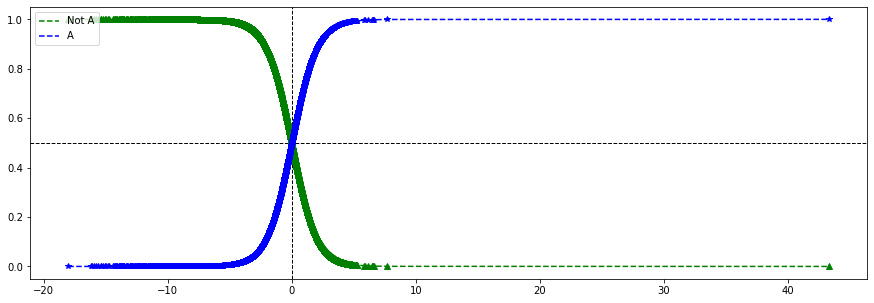

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.axhline(y=0.5, linestyle='--', color='k', linewidth=1)
plt.axvline(x=0, linestyle='--', color='k', linewidth=1)

plt.plot(df['decision function'], df['Not A'], 'g--', label='Not A')
plt.plot(df['decision function'], df['Not A'], 'g^')
plt.plot(df['decision function'], df['A'], 'b--', label='A')
plt.plot(df['decision function'], df['A'], 'b*')

plt.xlabel
plt.ylabel

plt.legend(loc='upper left')

plt.show()

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

pred = logR.predict(test_x)

test_cm = confusion_matrix(test_y, pred)
test_acc = accuracy_score(test_y, pred)
test_pre = precision_score(test_y, pred)
test_rec = recall_score(test_y, pred)
test_f1 = f1_score(test_y, pred)

print(test_cm)
print('\n')
print('정확도\t {:.2f}'.format(test_acc * 100))
print('정밀도\t {:.2f}'.format(test_pre * 100))
print('재현율\t {:.2f}'.format(test_rec * 100))
print('F1\t {:.2f}'.format(test_f1 * 100))

[[2762  252]
 [ 337  667]]


정확도	 85.34
정밀도	 72.58
재현율	 66.43
F1	 69.37


In [16]:
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      3014
           1       0.73      0.66      0.69      1004

    accuracy                           0.85      4018
   macro avg       0.81      0.79      0.80      4018
weighted avg       0.85      0.85      0.85      4018



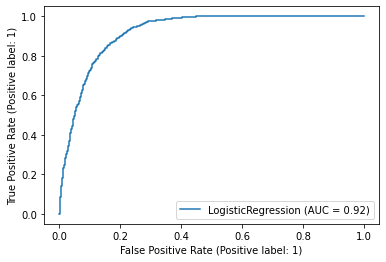

In [17]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(logR, test_x, test_y)
plt.show()

## 소프트맥스 회귀

In [19]:
body = pd.read_csv('../data/bodyPerformance.csv')
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [21]:
body['gender'] = np.where(body['gender'] == 'M', 0, 1)
mapping = {'A':0, 'B':1, 'C':2, 'D':3}
body['class_2'] = body['class'].map(mapping)

body


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_2
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,2
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,0
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,2
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,1
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,2
13389,21.0,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,3
13390,39.0,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,0
13391,64.0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,3


In [22]:
from sklearn.model_selection import train_test_split

x = body.drop(['class', 'class_2'], axis=1)
y = body['class_2']

train_x, test_x, train_y, test_y = train_test_split(x, y, stratify=y, test_size=0.3, random_state=1)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(9375, 11) (4018, 11) (9375,) (4018,)


In [23]:
from sklearn.linear_model import LogisticRegression

softm = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10, random_state=45)

In [24]:
softm.fit(train_x, train_y)

LogisticRegression(C=10, multi_class='multinomial', random_state=45)

In [25]:
pred = softm.predict(test_x)

print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.65      0.70      0.68      1004
           1       0.43      0.40      0.42      1004
           2       0.52      0.52      0.52      1005
           3       0.78      0.77      0.78      1005

    accuracy                           0.60      4018
   macro avg       0.60      0.60      0.60      4018
weighted avg       0.60      0.60      0.60      4018



In [31]:
pd.DataFrame(confusion_matrix(test_y, pred, labels=softm.classes_), columns=['pred_'+str(i) for i in softm.classes_], 
            index=['real_'+str(i) for i in softm.classes_] )

,pred_0,pred_1,pred_2,pred_3
real_0,707,261,36,0
real_1,269,403,300,32
real_2,92,207,525,181
real_3,13,63,157,772


In [27]:
softm.classes_

array([0, 1, 2, 3], dtype=int64)